In [0]:
!!pip uninstall tensorflow
!pip install tensorflow==2.0.0

  Using cached https://files.pythonhosted.org/packages/46/0f/7bd55361168bb32796b360ad15a25de6966c9c1beb58a8e30c01c8279862/tensorflow-2.0.0-cp36-cp36m-manylinux2010_x86_64.whl


In [0]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

import time
import string

from tqdm import tqdm
from wordcloud import WordCloud, STOPWORDS

import re
import nltk
import pickle
from nltk.tokenize import WordPunctTokenizer,word_tokenize,RegexpTokenizer
from nltk.corpus import stopwords

#nltk.download('all')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

from nltk.stem.wordnet import WordNetLemmatizer
#Importing Sklearn function for splitting dataset for training and testing
from sklearn.model_selection  import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import OneHotEncoder
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import tensorflow as tf
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import keras 
import numpy as np
from keras.preprocessing.text import Tokenizer
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, Dropout, Embedding, LSTM, Flatten
from keras.models import Model
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


**Loading the Dataset**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#Loading the dataset
df = pd.read_excel("/content/drive/My Drive/Input Data Synthetic.xlsx")

In [0]:
#Have a look at first five rows in dataset
df.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [0]:
#number of rows and columns
df.shape

(8500, 4)

**Description - There are 8500 observations and 4 features**

In [0]:
#Datatypes of each attribute
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


**Description -All the 4 attributes are of object type**

In [0]:
df.isnull().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

**Description - There are null values in 'Short description' and 'Description' columns.**

In [0]:
#Dropping the column Caller as it is insignificant for our model
df = df.drop(['Caller'],axis = 1)

In [0]:
df = df.dropna()
df = df.reset_index(drop=True)
print(df.isnull().sum())
df_test = pd.DataFrame(df)

Short description    0
Description          0
Assignment group     0
dtype: int64


In [0]:
print('Shape of dataset ',df.shape)
print(df.columns)
print('No. of unique group',len(set(df['Assignment group'])))

Shape of dataset  (8491, 3)
Index(['Short description', 'Description', 'Assignment group'], dtype='object')
No. of unique group 74


In [0]:
df['Assignment group'].value_counts()

GRP_0     3968
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
          ... 
GRP_35       1
GRP_73       1
GRP_64       1
GRP_67       1
GRP_61       1
Name: Assignment group, Length: 74, dtype: int64

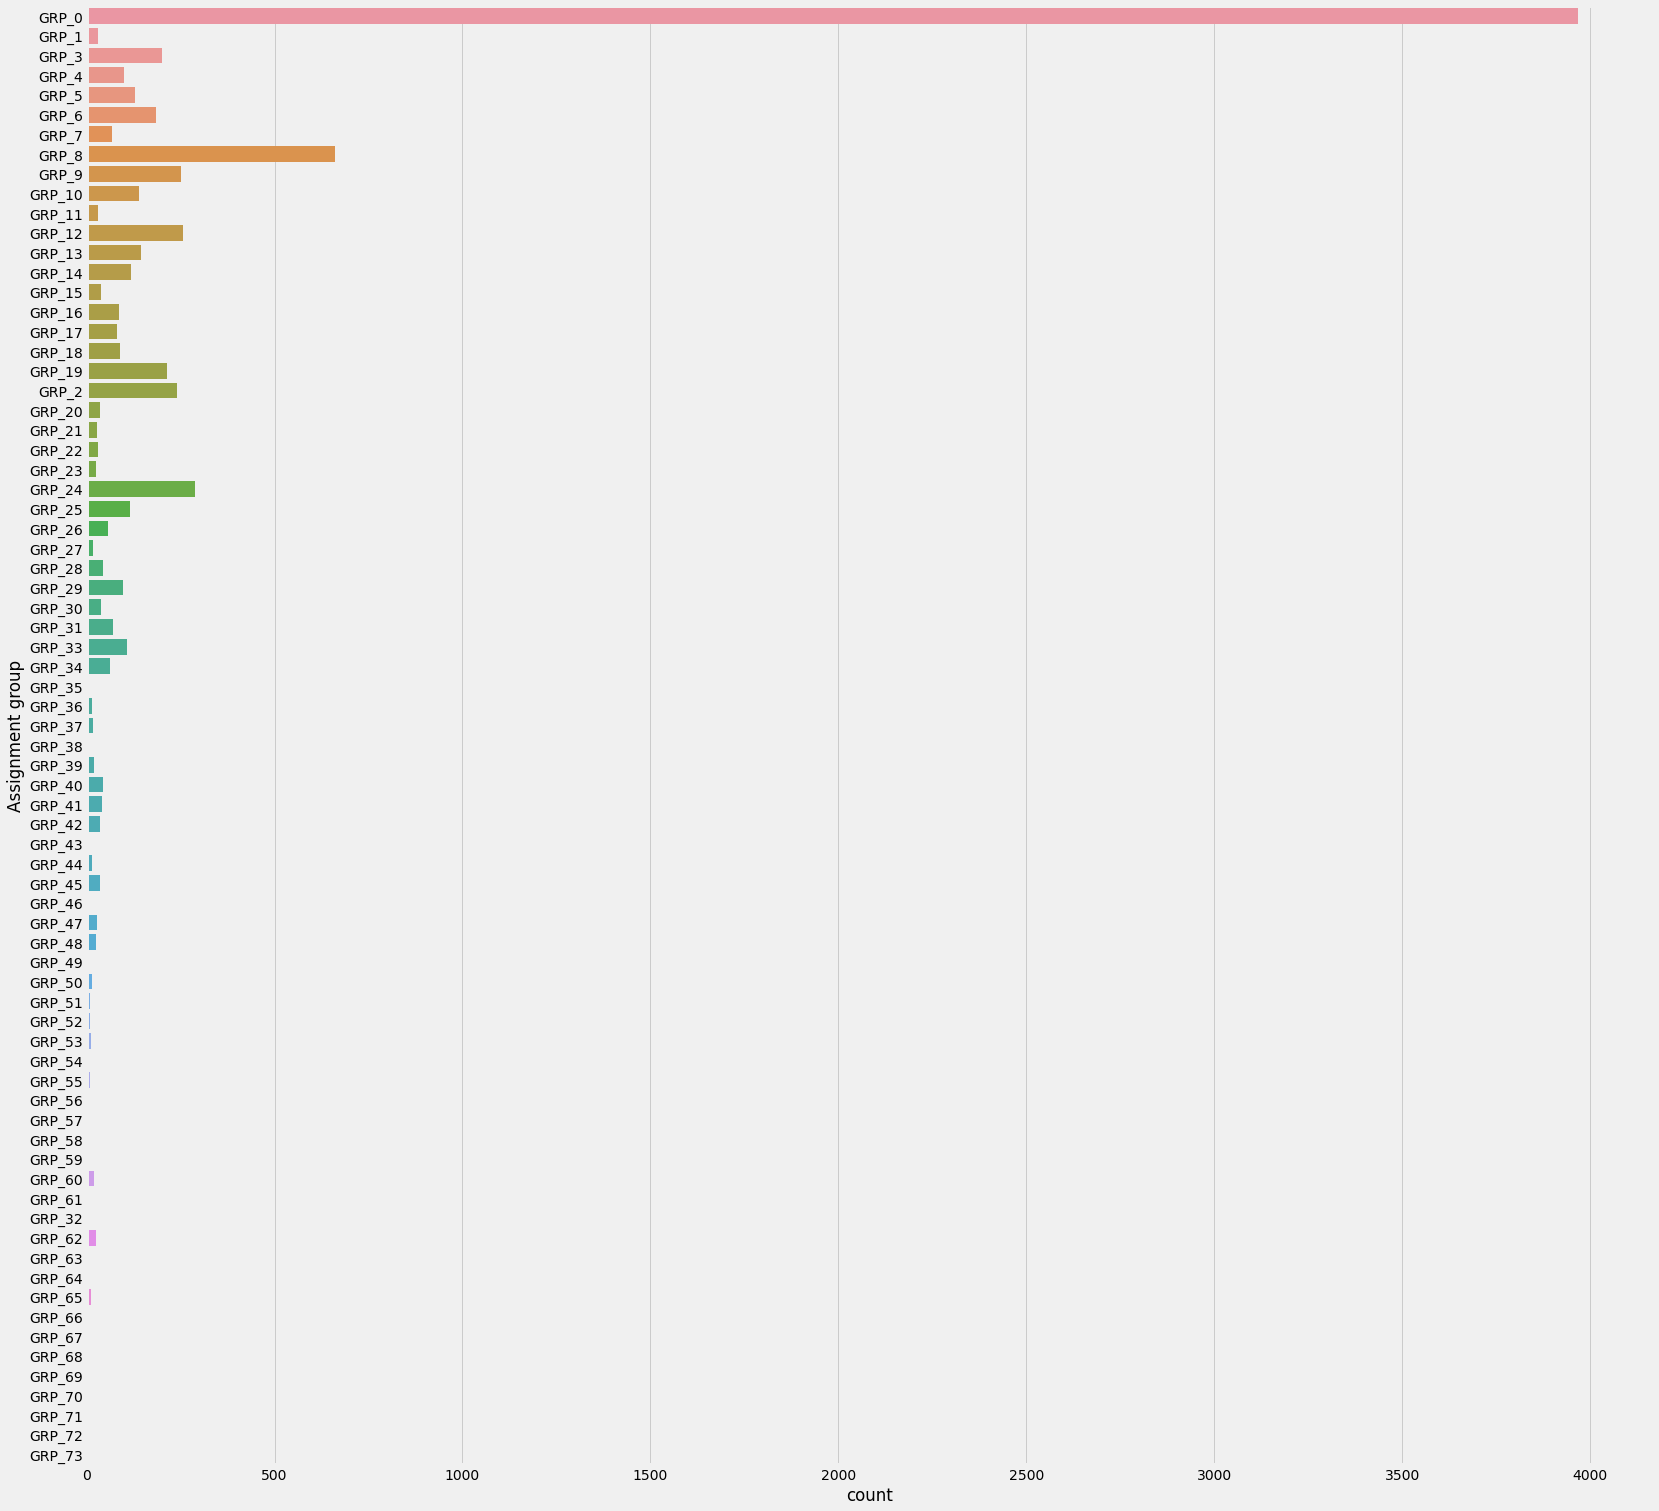

In [0]:
#Now let's plot the Assignment group after dropping the null values
group=df['Assignment group']
plt.figure(figsize=(25,25))
sns.countplot(y=group)
plt.show()

In [0]:
#Lets check count words according to the group
df['target'] = df['Assignment group'].astype('category').cat.codes
df['num_words'] = df.Description.apply(lambda x : len(x.split()))
df['bins']=pd.cut(df.num_words, bins=[0,100,300,500,1000, np.inf], labels=['0-100', '100-300', '300-500','500-800' ,'>1000'])

In [0]:
word_distribution = df.groupby('bins').size().reset_index().rename(columns={0:'counts'})
word_distribution.head()

,bins,counts
0,0-100,8086
1,100-300,361
2,300-500,18
3,500-800,12
4,>1000,12


Text(0.5, 1.0, 'Word distribution per bin')

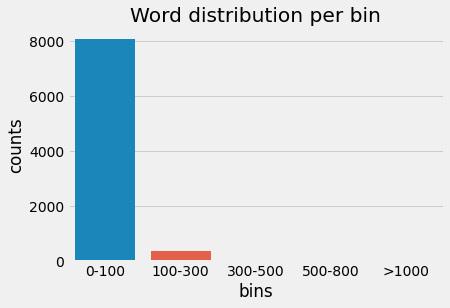

In [0]:
#Let visualize the words count as per the bins(including group)
sns.barplot(x='bins', y='counts', data=word_distribution).set_title("Word distribution per bin")

In [0]:
#Load head 10 records in the dataset
df.head(10)

,Short description,Description,Assignment group,target,num_words,bins
0,login issue,-verified user details.(employee# & manager na...,GRP_0,0,33,0-100
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,GRP_0,0,25,0-100
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,GRP_0,0,11,0-100
3,unable to access hr_tool page,unable to access hr_tool page,GRP_0,0,5,0-100
4,skype error,skype error,GRP_0,0,2,0-100
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,GRP_0,0,9,0-100
6,event: critical:HostName_221.company.com the v...,event: critical:HostName_221.company.com the v...,GRP_1,1,11,0-100
7,ticket_no1550391- employment status - new non-...,ticket_no1550391- employment status - new non-...,GRP_0,0,9,0-100
8,unable to disable add ins on outlook,unable to disable add ins on outlook,GRP_0,0,7,0-100
9,ticket update on inplant_874773,ticket update on inplant_874773,GRP_0,0,4,0-100


In [0]:
macronum=sorted(set(df['Assignment group']))
macro_to_id = dict((note, number) for number, note in enumerate(macronum))

def reassigngroupid(i):
    return macro_to_id[i]

['GRP_0', 'GRP_1', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14', 'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2', 'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25', 'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_3', 'GRP_30', 'GRP_31', 'GRP_32', 'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36', 'GRP_37', 'GRP_38', 'GRP_39', 'GRP_4', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_43', 'GRP_44', 'GRP_45', 'GRP_46', 'GRP_47', 'GRP_48', 'GRP_49', 'GRP_5', 'GRP_50', 'GRP_51', 'GRP_52', 'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56', 'GRP_57', 'GRP_58', 'GRP_59', 'GRP_6', 'GRP_60', 'GRP_61', 'GRP_62', 'GRP_63', 'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67', 'GRP_68', 'GRP_69', 'GRP_7', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73', 'GRP_8', 'GRP_9']
{'GRP_0': 0, 'GRP_1': 1, 'GRP_10': 2, 'GRP_11': 3, 'GRP_12': 4, 'GRP_13': 5, 'GRP_14': 6, 'GRP_15': 7, 'GRP_16': 8, 'GRP_17': 9, 'GRP_18': 10, 'GRP_19': 11, 'GRP_2': 12, 'GRP_20': 13, 'GRP_21': 14, 'GRP_22': 15, 'GRP_23': 16, 'GRP_24': 17, 'GRP_25': 18, 'GRP_26': 19, '

In [0]:
#Creating a list of stop words 
stop_words = set(stopwords.words("english"))

**Word Could distrubution before preprocessing of the text**

In [0]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stop_words,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    

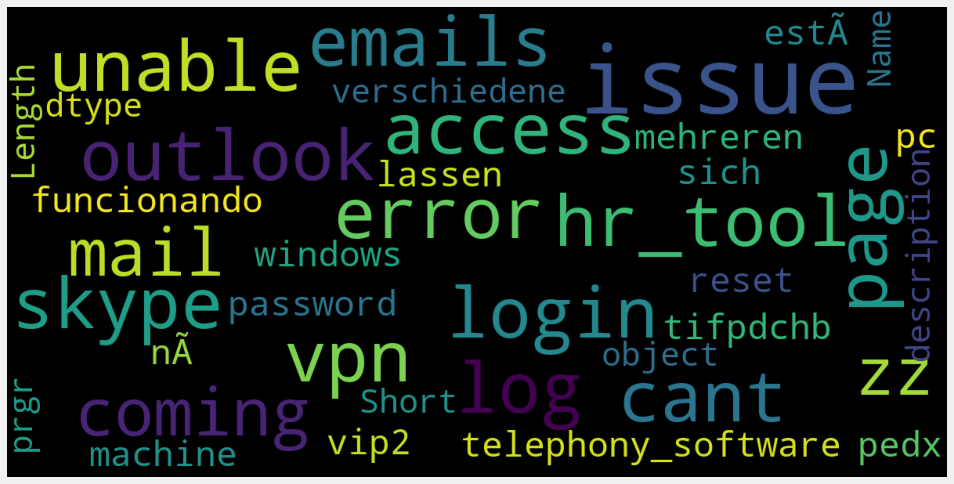

In [0]:
#Word cloud distribution of "Sub description"
show_wordcloud(df["Short description"])

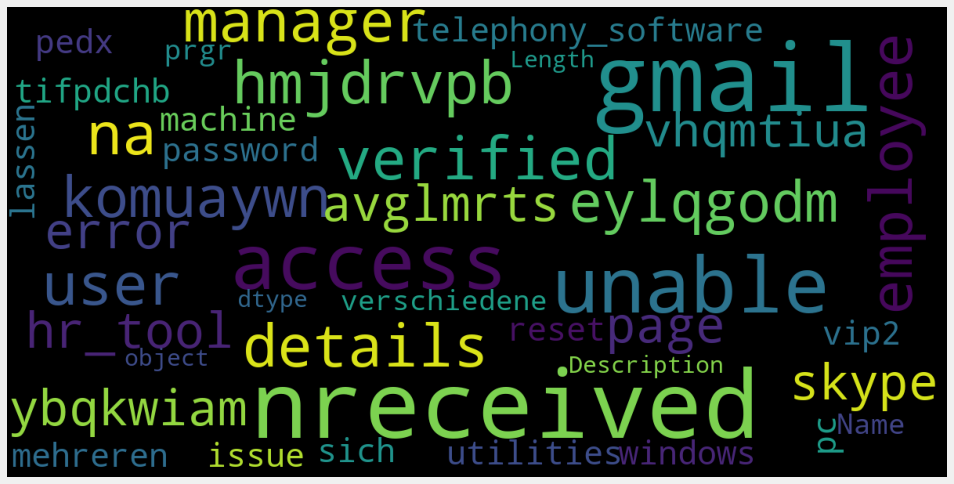

In [0]:
#Word cloud distribution of "Description"
show_wordcloud(df["Description"])

In [0]:
df['Assignment group']=df['Assignment group'].apply(reassigngroupid)

In [0]:
#Concate the two columns into one column Description
df['Description'] =  df['Short description'].str.cat(df['Description'], sep =" ") 
df.head()

,Short description,Description,Assignment group,target,num_words,bins
0,login issue,login issue -verified user details.(employee# ...,0,0,33,0-100
1,outlook,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...,0,0,25,0-100
2,cant log in to vpn,cant log in to vpn \r\n\r\nreceived from: eylq...,0,0,11,0-100
3,unable to access hr_tool page,unable to access hr_tool page unable to access...,0,0,5,0-100
4,skype error,skype error skype error,0,0,2,0-100


In [0]:
def preprocess_text(sentence):
    text=re.sub('received from:.\S+@\S+','',sentence)
    #Convert to lowercase
    text = str(text).lower()
    text = re.sub('[^a-zA-Z0-9\s]','',text)
    #Remove punctuations    
    text = re.sub(r"[!\"#$%&\'()*+,-./:;<=>?@^_`{|}~\[\]]"," ",text)    
    
    #remove tags
    text=re.sub("&lt;/?.:-_*?&gt;@"," &lt;&gt; ",text)    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    # Single character removal
    text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text)
    
    # Removing multiple spaces
    text = re.sub(r'\s+', ' ', text)

    text= word_tokenize(text)
    text = " ".join(text)
    #Convert to list from string
    text = text.split()
    
    text=[w for w in text if not w in stop_words]
    #convert to string from list
    text = " ".join(text)
    #Convert to list from string
    text = text.split()
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word,'v') for word in text] 
    text = " ".join(text)    
    return text

In [0]:
from collections import defaultdict
from bs4 import BeautifulSoup
import sys
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
plt.switch_backend('agg')
%matplotlib inline

In [0]:
print(df.Description.shape[0])

8491


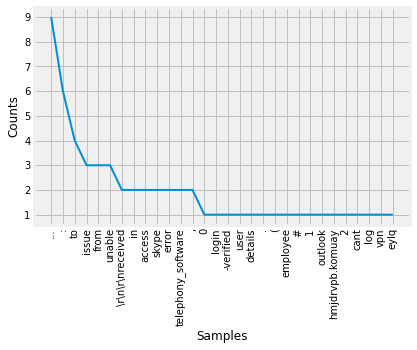

In [0]:
from nltk.probability import FreqDist
text = str(df['Description'])
fdist = FreqDist()
for word in word_tokenize(text):
    fdist[word.lower()] += 1
#fdist.most_common(50)

fdist.plot(30)

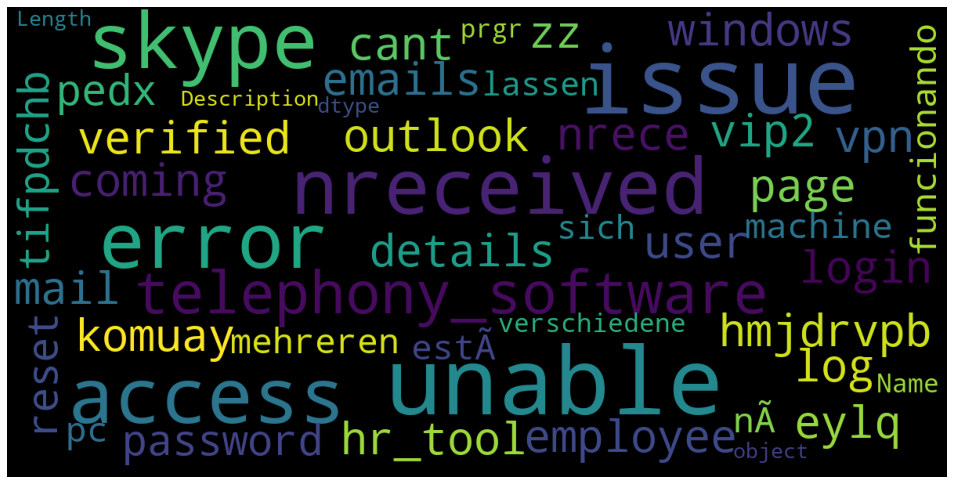

In [0]:
#Word cloud distribution of "Description"
show_wordcloud(df["Description"])

In [0]:
texts = []
labels = []


for idx in range(df.Description.shape[0]):
    text = BeautifulSoup(df.Description[idx])
    texts.append(preprocess_text(str(text.get_text())))
    df.Description[idx]=preprocess_text(str(df.Description[idx]))

for idx in df['Assignment group']:
    labels.append(idx)

**Word cloud distribution after preprocessing of the text**

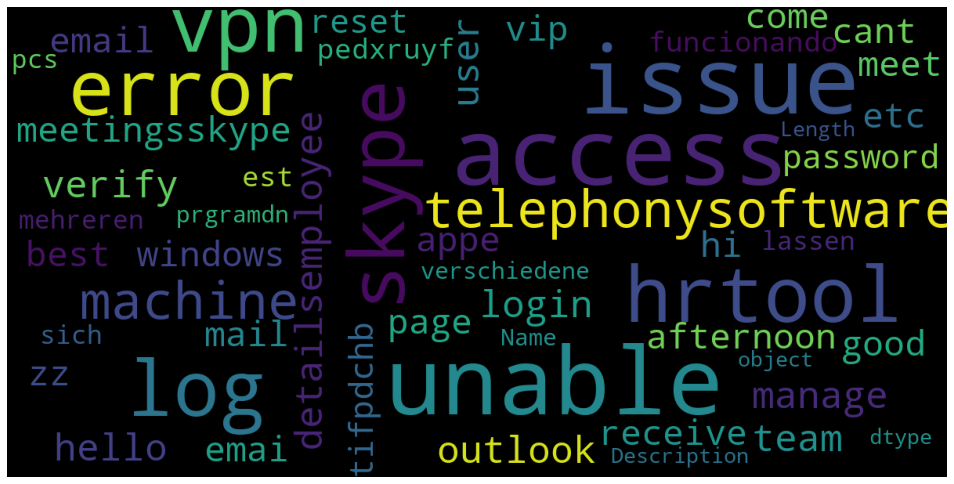

In [0]:
#Word cloud distribution of "Description"
show_wordcloud(df["Description"])

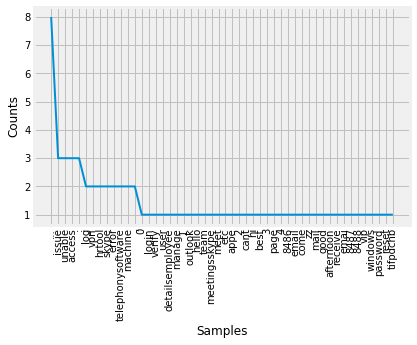

In [0]:
text = str(df['Description'])
fdist = FreqDist()
for word in word_tokenize(text):
    fdist[word.lower()] += 1
#fdist.most_common(50)

fdist.plot(50)

In [0]:
df['num_words'] = df.Description.apply(lambda x : len(x.split()))

In [0]:
df.num_words.describe()

count    8491.000000
mean       21.065717
std        38.738815
min         0.000000
25%         8.000000
50%        12.000000
75%        22.000000
max       803.000000
Name: num_words, dtype: float64

In [0]:
MAX_SEQUENCE_LENGTH = df.num_words.max()
MAX_NB_WORDS = 20000
EMBEDDING_DIM = 100
VALIDATION_SPLIT = 0.2

In [0]:
#
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Number of Unique Tokens',len(word_index))

Number of Unique Tokens 14529


In [0]:
data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

labels = to_categorical(np.asarray(labels))
print('Shape of Data Tensor:', data.shape)
print('Shape of Label Tensor:', labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
nb_validation_samples = int(VALIDATION_SPLIT * data.shape[0])

x_train = data[:-nb_validation_samples]
y_train = labels[:-nb_validation_samples]
x_val = data[-nb_validation_samples:]
y_val = labels[-nb_validation_samples:]


Shape of Data Tensor: (8491, 803)
Shape of Label Tensor: (8491, 74)


In [0]:
# describes info about train and test set 
print("Number transactions X_train dataset: ", x_train.shape) 
print("Number transactions y_train dataset: ", y_train.shape) 
print("Number transactions x_val dataset: ", x_val.shape) 
print("Number transactions y_val dataset: ", y_val.shape) 


Number transactions X_train dataset:  (6793, 803)
Number transactions y_train dataset:  (6793, 74)
Number transactions x_val dataset:  (1698, 803)
Number transactions y_val dataset:  (1698, 74)


**Importing the Glove embedding for the word embedding**



In [0]:
#Drive glove file path
glove_file = "/content/drive/My Drive/glove.6B.zip"
#Extract Glove embedding zip file
from zipfile import ZipFile
with ZipFile(glove_file, 'r') as z:
  z.extractall()

In [0]:
# load the pre-trained word-embedding vectors
embeddings_index = {}
f = open('/content/glove.6B.100d.txt',encoding='utf8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Total %s word vectors in Glove 6B 100d.' % len(embeddings_index))

Total 400001 word vectors in Glove 6B 100d.


In [0]:
# load the pre-trained word-embedding vectors
embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [0]:
#importing libraries for model building
import tensorflow 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential
from keras.utils import to_categorical
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import plot_model

In [0]:
#setting learing rate for adam optimizer
optadm = tensorflow.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

**Building simple Deep learning model**

In [0]:
embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,trainable=True)

sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
l_flat = Flatten()(embedded_sequences)
l_dropuout=Dropout(rate=0.5)(l_flat)
l_dense = Dense(40, activation='relu')(l_dropuout)
preds = Dense(len(macronum), activation='softmax')(l_dense)

model = Model(sequence_input, preds)
model.compile(loss='categorical_crossentropy',
              optimizer=optadm,
              metrics=['acc'])

print("Simplified neural network")
model.summary()
cp=ModelCheckpoint('model.hdf5',monitor='val_acc',verbose=1,save_best_only=True)

Simplified neural network
Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 803)]             0         
_________________________________________________________________
embedding_10 (Embedding)     (None, 803, 100)          1453000   
_________________________________________________________________
flatten_3 (Flatten)          (None, 80300)             0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 80300)             0         
_________________________________________________________________
dense_25 (Dense)             (None, 40)                3212040   
_________________________________________________________________
dense_26 (Dense)             (None, 74)                3034      
Total params: 4,668,074
Trainable params: 4,668,074
Non-trainable params: 0
_______________________

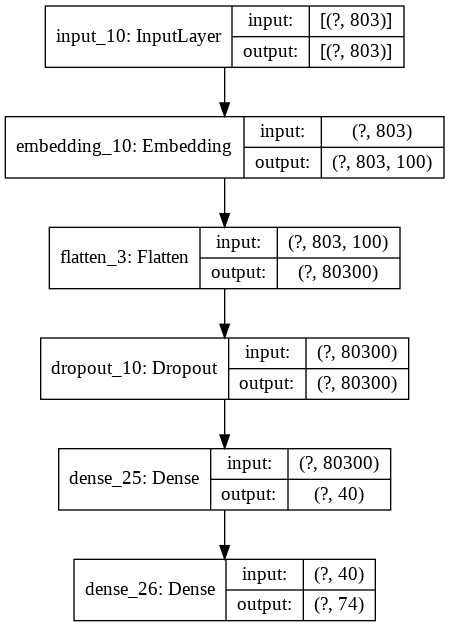

In [0]:
#Plot the model architecture for simple Deep learning model
plot_model(model, to_file='/content/drive/My Drive/model_plot1.png', show_shapes=True, show_layer_names=True)

In [0]:
batch_size = 100
epochs = 50
history = model.fit(x_train, y_train, validation_data=(x_val, y_val),epochs=epochs, batch_size=batch_size,callbacks=[cp])

Epoch 1/50
67/68 [============================>.] - ETA: 0s - loss: 4.9479 - acc: 0.3157
Epoch 00001: val_acc improved from -inf to 0.47173, saving model to model.hdf5
68/68 [==============================] - 3s 38ms/step - loss: 4.9374 - acc: 0.3183 - val_loss: 4.2355 - val_acc: 0.4717
Epoch 2/50
67/68 [============================>.] - ETA: 0s - loss: 4.1987 - acc: 0.4672
Epoch 00002: val_acc did not improve from 0.47173
68/68 [==============================] - 2s 35ms/step - loss: 4.1985 - acc: 0.4662 - val_loss: 4.1615 - val_acc: 0.4717
Epoch 3/50
67/68 [============================>.] - ETA: 0s - loss: 4.1262 - acc: 0.4657
Epoch 00003: val_acc did not improve from 0.47173
68/68 [==============================] - 2s 35ms/step - loss: 4.1254 - acc: 0.4662 - val_loss: 4.0905 - val_acc: 0.4717
Epoch 4/50
67/68 [============================>.] - ETA: 0s - loss: 4.0553 - acc: 0.4669
Epoch 00004: val_acc did not improve from 0.47173
68/68 [==============================] - 2s 35ms/step -

**Visualization of the Loss and Accuracy for the Simple Deep learning model**

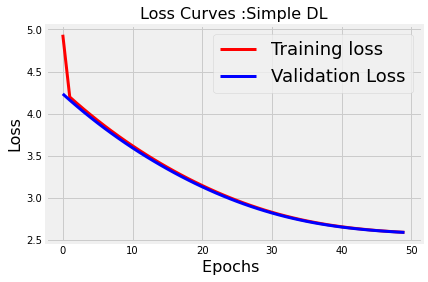

In [0]:
fig1 = plt.figure()
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves :Simple DL',fontsize=16)
fig1.savefig('loss_cnn.png')
plt.show()

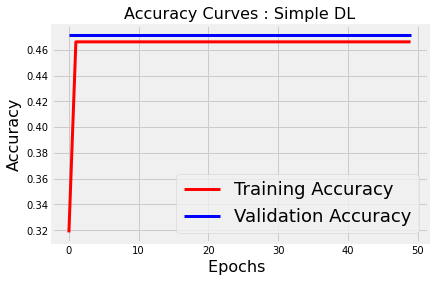

In [0]:
fig2=plt.figure()
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves : Simple DL',fontsize=16)
fig2.savefig('accuracy_cnn.png')
plt.show()

**Model building using RNN**

In [0]:
embedding_layer_rnn = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=True)

In [0]:
sequence_input_rnn = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences_rnn = embedding_layer_rnn(sequence_input_rnn)
l_lstm = Bidirectional(LSTM(128))(embedded_sequences_rnn)
l_dense = Dense(64, activation='relu')(l_lstm)
l_dropuout = Dropout(0.5)(l_dense)
preds_rnn = Dense(len(macronum), activation='softmax')(l_dropuout)
model_rnn = Model(sequence_input_rnn, preds_rnn)
model_rnn.compile(loss='categorical_crossentropy',
              metrics=['acc'],optimizer=optadm)

print("Bidirectional LSTM")
model_rnn.summary()

Bidirectional LSTM
Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 803)]             0         
_________________________________________________________________
embedding_11 (Embedding)     (None, 803, 100)          1453000   
_________________________________________________________________
bidirectional_7 (Bidirection (None, 256)               234496    
_________________________________________________________________
dense_27 (Dense)             (None, 64)                16448     
_________________________________________________________________
dropout_11 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 74)                4810      
Total params: 1,708,754
Trainable params: 1,708,754
Non-trainable params: 0
______________________________

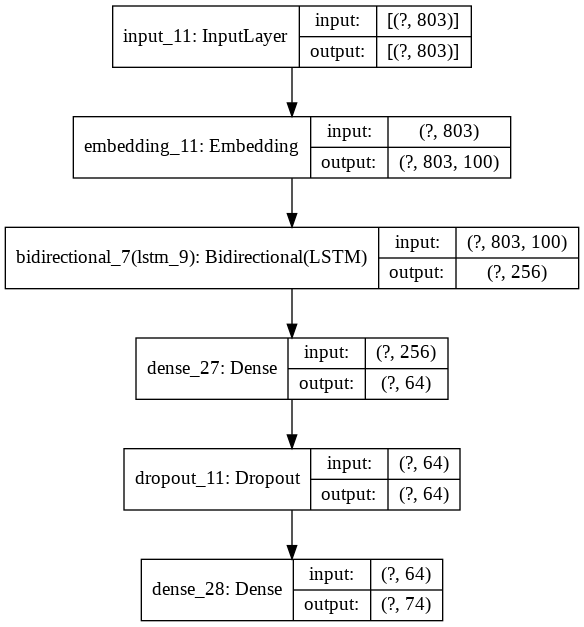

In [0]:
plot_model(model_rnn, to_file='/content/drive/My Drive/model_rnn_plot.png', show_shapes=True, show_layer_names=True)

In [0]:
cp_rnn=ModelCheckpoint('model_rnn.hdf5',monitor='val_acc',verbose=1,save_best_only=True)
batch_size = 100
epochs = 50
history_rnn=model_rnn.fit(x_train, y_train, validation_data=(x_val, y_val),epochs=epochs, batch_size=batch_size,callbacks=[cp_rnn])

Epoch 1/50
68/68 [==============================] - ETA: 0s - loss: 2.4264 - acc: 0.5095
Epoch 00001: val_acc improved from -inf to 0.57479, saving model to model_rnn.hdf5
68/68 [==============================] - 13s 190ms/step - loss: 2.4264 - acc: 0.5095 - val_loss: 1.9224 - val_acc: 0.5748
Epoch 2/50
68/68 [==============================] - ETA: 0s - loss: 1.8634 - acc: 0.5735
Epoch 00002: val_acc improved from 0.57479 to 0.60071, saving model to model_rnn.hdf5
68/68 [==============================] - 12s 181ms/step - loss: 1.8634 - acc: 0.5735 - val_loss: 1.6663 - val_acc: 0.6007
Epoch 3/50
68/68 [==============================] - ETA: 0s - loss: 1.6057 - acc: 0.6056
Epoch 00003: val_acc improved from 0.60071 to 0.60424, saving model to model_rnn.hdf5
68/68 [==============================] - 12s 180ms/step - loss: 1.6057 - acc: 0.6056 - val_loss: 1.6882 - val_acc: 0.6042
Epoch 4/50
68/68 [==============================] - ETA: 0s - loss: 1.4227 - acc: 0.6270
Epoch 00004: val_acc im

**Visualization for RNN model Loss and Accuracy**

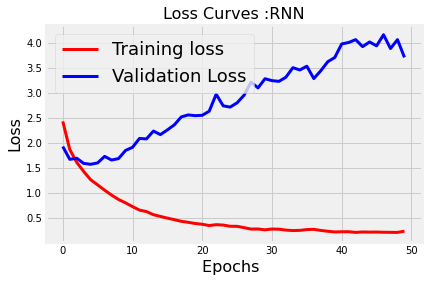

In [0]:
fig1 = plt.figure()
plt.plot(history_rnn.history['loss'],'r',linewidth=3.0)
plt.plot(history_rnn.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves :RNN',fontsize=16)
fig1.savefig('loss_rnn.png')
plt.show()

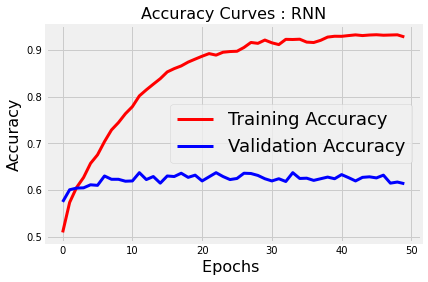

In [0]:
fig2=plt.figure()
plt.plot(history_rnn.history['acc'],'r',linewidth=3.0)
plt.plot(history_rnn.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves : RNN',fontsize=16)
fig2.savefig('accuracy_rnn.png')
plt.show()

**Observations :**


* Based on the above plots, RNN has achieved good validation accuracy with high consistency,but they are not that consistent throughout all the epochs.
* Simple Deep learning model was found to be poorly performing architecture to implement for production usage.
* RNN model has performed better than the other model (DL Model) in terms of training time.
* When training samples are less RNN has achieved the comfortable validation accuracy.

based on the result above the analysis we can see that we faced with imbalanced data sets there is no one stop solution to improve the accuracy of the prediction model. One may need to try out multiple methods to figure out the best-suited sampling techniques for the dataset. In most cases, synthetic techniques like SMOTE and MSMOTE will outperform the conventional oversampling and undersampling methods.

Depending on the characteristics of the imbalanced data set, the most effective techniques will vary. Relevant evaluation parameters should be considered during the model comparison which are mentioned below in the Performance Improvement points.

## **Performance Improvements :**
To achieve the better performances, we need:

**Using sampling techniques** : Sampling technqiues need to used since the based on the above observation the dataset is biased.

**Fine Tune Hyper-Parameters** : Hyper-parameters are the variables which are set before training and determine the network structure & how the network is trained. (eg : learning rate, batch size, number of epochs). Fine tuning can be done by : Manual Search, Grid Search, Random Search…

**Improve Text Pre-Processing** : Better pre-processing of input data can be done as per the need of your dataset like removing some special symbols, numbers, stopwords and so on …

**Use more Dropout Layer(s)** : Dropout is regularization technique to avoid overfitting (increase the validation accuracy) thus increasing the generalizing power.
